In [22]:
# import the required libraries

import seaborn as sns
import numpy as np # for data manipulation
from numpy import mean
from numpy import std
from numpy import nan
from numpy import isnan
import pandas as pd # for data manipulation
from pandas.plotting import scatter_matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split # will be used for data split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # for preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot

In [23]:
# load dataset
df = pd.read_csv('../Data-imp-feat.csv')
print('Shape:', df.shape)# set input matrix and target column

Shape: (526, 6)


Class=4.0, Count=224, Percentage=42.59%
(526, 6)
Class=2.0, Count=161, Percentage=30.61%
(526, 6)
Class=3.0, Count=87, Percentage=16.54%
(526, 6)
Class=1.0, Count=54, Percentage=10.27%
(526, 6)
[4 2 3 1]
Damage_Class
1     54
2    161
3     87
4    224
dtype: int64


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


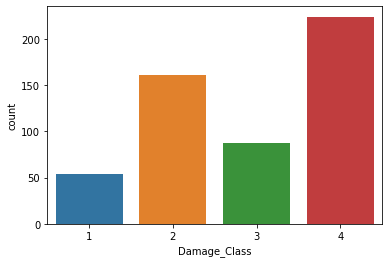

In [24]:
# summarize the class distribution
target = df.values[:, -1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%s, Percentage=%.2f%%' % (k, v, per))
    print(df.shape)
print(df['Damage_Class'].unique())
print(df.groupby('Damage_Class').size())
sns.countplot(df['Damage_Class'])
pyplot.show()

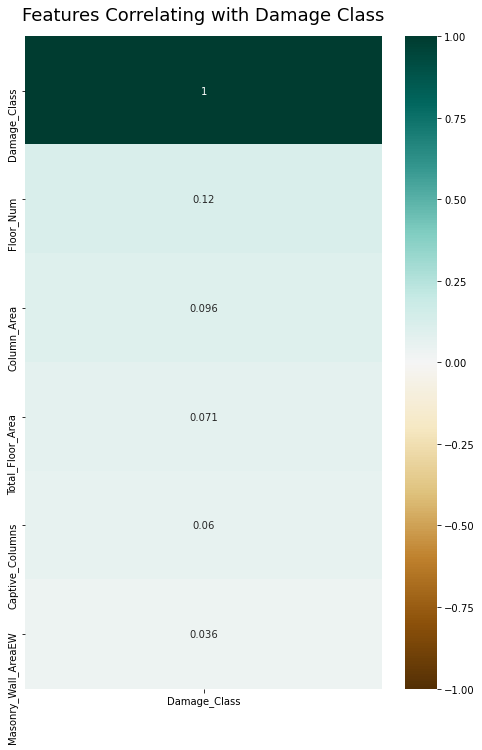

In [25]:
# Correlation of Independent Variables with the Dependent Variable
pyplot.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Damage_Class']].sort_values(by='Damage_Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Damage Class', fontdict={'fontsize':18}, pad=16);
pyplot.savefig('heatmap_damage.png', dpi=200, bbox_inches='tight')


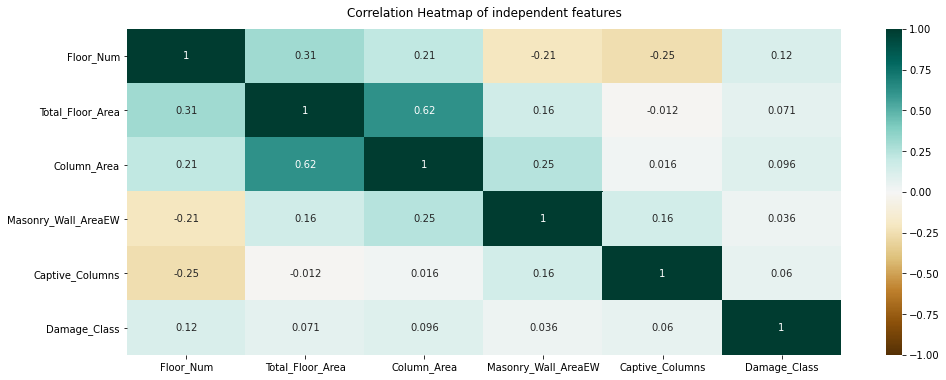

In [26]:
# Increase the size of the heatmap.
pyplot.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap of independent features', fontdict={'fontsize':12}, pad=12);

# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
pyplot.savefig('heatmap.png', dpi=300, bbox_inches='tight')

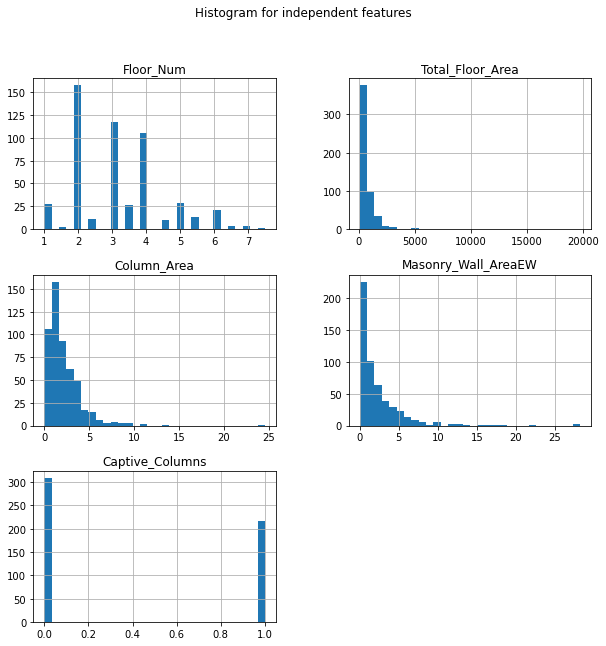

<Figure size 432x288 with 0 Axes>

In [27]:
# # create a histogram plot of each variable
import pylab as pl
df.drop('Damage_Class',axis=1).hist(bins=30, figsize=(10,10))
pl.suptitle("Histogram for independent features")
pyplot.savefig('Damage_hist')
pyplot.show()
pyplot.savefig('Hist_independent_feat.png', dpi=300, bbox_inches='tight')

In [28]:
# count the number of missing values for each column
num_missing = (df[['Floor_Num', 'Total_Floor_Area', 'Column_Area', 'Masonry_Wall_AreaEW', 'Captive_Columns']] == nan).sum()
# report the results
print(num_missing)

Floor_Num              0
Total_Floor_Area       0
Column_Area            0
Masonry_Wall_AreaEW    0
Captive_Columns        0
dtype: int64


In [29]:
# count the number of nan values in each column
print(df[['Floor_Num', 'Total_Floor_Area', 'Column_Area', 'Masonry_Wall_AreaEW', 'Captive_Columns']].isnull().sum())

Floor_Num              0
Total_Floor_Area       0
Column_Area            3
Masonry_Wall_AreaEW    0
Captive_Columns        0
dtype: int64


In [30]:
# retrieve the numpy array
values = df[['Floor_Num', 'Total_Floor_Area', 'Column_Area', 'Masonry_Wall_AreaEW', 'Captive_Columns']].values

In [31]:
# define imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')

In [32]:
# transform the dataset
trans_values = imputer.fit_transform(values)

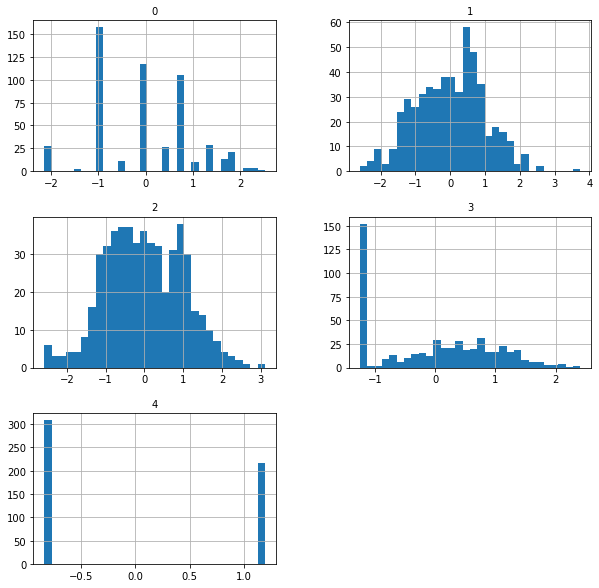

In [33]:
# Making data more Gaussian
# power transform the raw data
from sklearn.preprocessing import PowerTransformer
data = trans_values[:,:]
# perform a box-cox transform of the dataset
from pandas import DataFrame
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method= 'yeo-johnson')
data = pt.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(bins=30, figsize=(10,10), xlabelsize=10, ylabelsize=10)
[x.title.set_size(10) for x in fig.ravel()]
# show the plot
pyplot.show()

In [34]:
# split dataset into inputs and outputs
#array = df.values
#print('Shape:', df.shape)# set input matrix and target column
X = dataset.values[:,:]
y = df.values[:, 5]
print('Shape of df:', df.shape)
print('Shape of X:', X.shape)

Shape of df: (526, 6)
Shape of X: (526, 5)


Class=4, n=224 (25.000%)
Class=2, n=224 (25.000%)
Class=3, n=224 (25.000%)
Class=1, n=224 (25.000%)


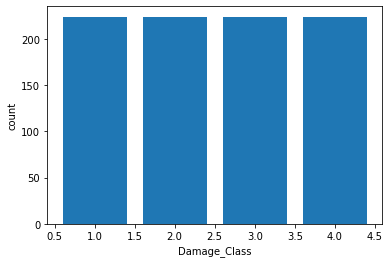

In [35]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.xlabel('Damage_Class')
pyplot.ylabel('count')
pyplot.show()

In [36]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [37]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# encoding the dependent variable
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

In [39]:
# Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=1)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.521
Accuracy score (validation): 0.422
Learning rate:  0.075
Accuracy score (training): 0.532
Accuracy score (validation): 0.428
Learning rate:  0.1
Accuracy score (training): 0.559
Accuracy score (validation): 0.439
Learning rate:  0.25
Accuracy score (training): 0.642
Accuracy score (validation): 0.444
Learning rate:  0.5
Accuracy score (training): 0.691
Accuracy score (validation): 0.483
Learning rate:  0.75
Accuracy score (training): 0.743
Accuracy score (validation): 0.472
Learning rate:  1
Accuracy score (training): 0.770
Accuracy score (validation): 0.511


In [40]:
train_predictions = gb_clf.predict(X_train)

print("Confusion Matrix:")
print(confusion_matrix(y_train, train_predictions))

print("Classification Report")
print(classification_report(y_train, train_predictions))

Confusion Matrix:
[[158   4   7   7]
 [ 12 130  19  16]
 [  7  18 136  23]
 [ 11  17  24 127]]
Classification Report
              precision    recall  f1-score   support

         1.0       0.84      0.90      0.87       176
         2.0       0.77      0.73      0.75       177
         3.0       0.73      0.74      0.74       184
         4.0       0.73      0.71      0.72       179

    accuracy                           0.77       716
   macro avg       0.77      0.77      0.77       716
weighted avg       0.77      0.77      0.77       716



In [41]:
test_predictions = gb_clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, test_predictions))

print("Classification Report")
print(classification_report(y_test, test_predictions))

Confusion Matrix:
[[34  4  5  5]
 [ 4 23 10 10]
 [ 4 15 16  5]
 [ 4 18  4 19]]
Classification Report
              precision    recall  f1-score   support

         1.0       0.74      0.71      0.72        48
         2.0       0.38      0.49      0.43        47
         3.0       0.46      0.40      0.43        40
         4.0       0.49      0.42      0.45        45

    accuracy                           0.51       180
   macro avg       0.52      0.50      0.51       180
weighted avg       0.52      0.51      0.51       180



[[34  4  5  5]
 [ 4 23 10 10]
 [ 4 15 16  5]
 [ 4 18  4 19]]


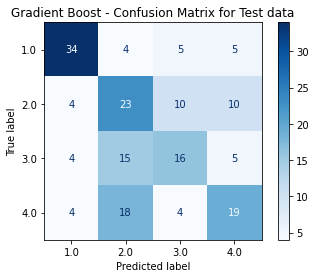

In [42]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(gb_clf, X_test, y_test,
                                 cmap=pyplot.cm.Blues)
title = ('Gradient Boost - Confusion Matrix for Test data')
disp.ax_.set_title(title)
print(disp.confusion_matrix)

pyplot.show()